IMPORT THE LIBRARIES

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

LOAD THE DATASET

In [198]:
titanic=sns.load_dataset('titanic')
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


GET SOME STASTICS

In [199]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


GET A COUNT OF THE NUMBER OF THE SURVIVORS

In [200]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

VISUALIZE THE COUNT OF SURVIVORS

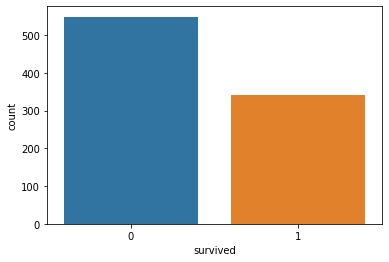

In [201]:
sns.countplot(titanic['survived'])

VISUALIZE THE COUNT OF SURVIVORS FOR COLUMNS 'who','sex','pclass','sibsp','parch','embarked'

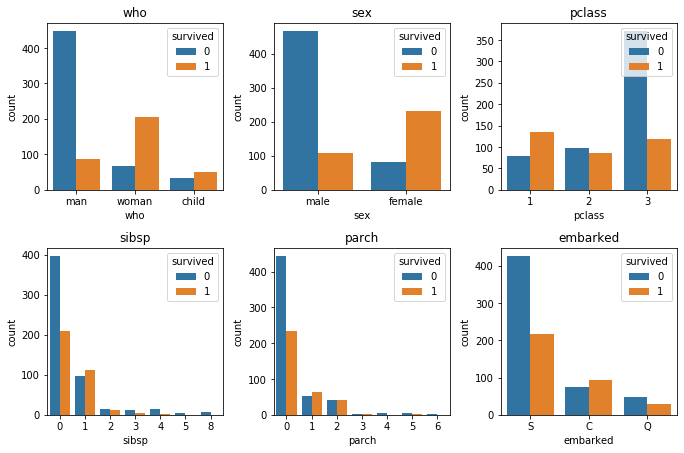

In [202]:
cols=['who','sex','pclass','sibsp','parch','embarked']
n_rows=2
n_cols=3
#The subplot grid and figure size of each graph
fig, axs=plt.subplots(n_rows, n_cols, figsize = (n_cols * 3.2, n_rows * 3.2))
for r in range(0,n_rows):
    for c in range(0,n_cols):
        i=r*n_cols+c #index to go through the no of columns
        ax=axs[r][c]#show where to position each subplot
        sns.countplot(titanic[cols[i]],hue=titanic["survived"],ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='survived',loc='upper right')
plt.tight_layout()

LOOK AT SURVIVAL RATE BY SEX

In [203]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


LOOK AT SURVIVAL RATE BY SEX AND CLASS

In [204]:
titanic.pivot_table('survived',index='sex',columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


titanic.pivot_table('survived',index='sex',columns='class').plot()

PLOT THE SURVIVAL RATE OF EACH CLASS

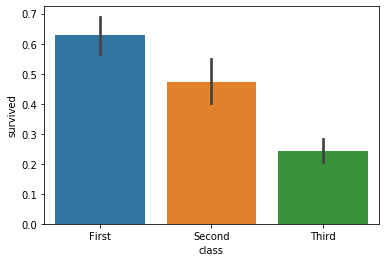

In [205]:
sns.barplot(x='class',y='survived',data=titanic)

LOOK AT SURVIVAL RATE BY AGE,SEX AND CLASS

In [206]:
age=pd.cut(titanic['age'],[0,18,80])
titanic.pivot_table('survived',['sex',age],'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

PLOT THE SURVIVAL RATE BY AGE,SEX AND CLASS

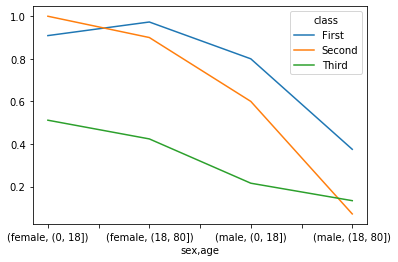

In [207]:
titanic.pivot_table('survived',['sex',age],'class').plot()

PLOT THE PRICES PAID OF EACH CLASSES

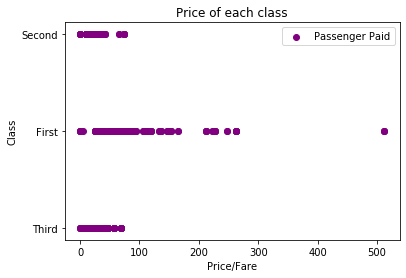

In [208]:
plt.scatter(titanic['fare'],titanic['class'],color='purple',label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price/Fare')
plt.title('Price of each class')
plt.legend()
plt.show()

COUNT THE EMPTY VALUE IN EACH COLUMN

In [209]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

LOOK AT ALL OF THE VALUES IN EACH COLUMN & GET COUNT 

In [210]:
for val in titanic:
    print(titanic[val].value_counts())
    print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In [211]:
#Drop the columns
titanic=titanic.drop(['deck','embark_town','alive','class','who','alone','adult_male'],axis=1)
#remove the rows with missing values
titanic=titanic.dropna(subset=['embarked','age'])

COUNT THE NEW NUMBER OF ROWS AND COLUMNS IN THE DATA SET

In [212]:
titanic.shape

(712, 8)

In [213]:
titanic.dtypes


survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [214]:
#PRINT THE UNIQUE VALUES IN THE COLUMN
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [215]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
#ENCODE THE SEX COLUMN
titanic.iloc[:, 2]=labelencoder.fit_transform(titanic.iloc[:, 2].values)
#ENCODE THE EMBARK COLUMN
titanic.iloc[:, 7]=labelencoder.fit_transform(titanic.iloc[:, 7].values)

In [216]:
#PRINT THE UNIQUE VALUES IN THE COLUMN
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


In [217]:
titanic.dtypes

survived      int64
pclass        int64
sex           int32
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int32
dtype: object

SPLIT THE DATA INTO INDEPENDENT 'X' AND DEPENDENT 'Y'


In [218]:
X=titanic.iloc[:,1:8].values
Y=titanic.iloc[:,0].values
#print(Y)

SPLIT THE DATASET INTO TRAINING AND TESTING

In [219]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

SCALE THE DATA

In [220]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)


TRAIN THE MODEL

In [221]:
def models(x_train,y_train):
    #use logistic regression
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(random_state=0)
    log.fit(x_train,y_train)
    #use KNeighbours
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
    knn.fit(x_train,y_train)
    #use SVC(linear_kernel)
    from sklearn.svm import SVC
    svc_lin=SVC(kernel='linear',random_state=0)
    svc_lin.fit(x_train,y_train)
    #use svc(rbf kernel)
    from sklearn.svm import SVC
    svc_rbf=SVC(kernel='rbf',random_state=0)
    svc_rbf.fit(x_train,y_train)
    #use gaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss=GaussianNB()
    gauss.fit(x_train,y_train)
    #use decision tree
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(x_train,y_train)
    #use random_forest
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    forest.fit(x_train,y_train)
    #Print the training accuracy of each model
    print('[0]Logistic Regression Training Accuracy: ',log.score(x_train,y_train))
    print('[1]K Neighbors Regression Training Accuracy: ',knn.score(x_train,y_train))
    print('[2]SVC linear_kernel Regression Training Accuracy: ',svc_lin.score(x_train,y_train))
    print('[3]SVC rbf Regression Training Accuracy: ',svc_rbf.score(x_train,y_train))    
    print('[4]GaussianNB Regression Training Accuracy: ',gauss.score(x_train,y_train))
    print('[5]Decision Tree Regression Training Accuracy: ',tree.score(x_train,y_train))
    print('[6]Random Forest Regression Training Accuracy: ',forest.score(x_train,y_train))
    return log,knn,svc_lin,svc_rbf,gauss,tree,forest
    
    

GET AND TRAIN ALL THE MODELS

In [222]:
model=models(x_train,y_train)

[0]Logistic Regression Training Accuracy:  0.7978910369068541
[1]K Neighbors Regression Training Accuracy:  0.8664323374340949
[2]SVC linear_kernel Regression Training Accuracy:  0.7768014059753954
[3]SVC rbf Regression Training Accuracy:  0.8506151142355008
[4]GaussianNB Regression Training Accuracy:  0.8031634446397188
[5]Decision Tree Regression Training Accuracy:  0.9929701230228472
[6]Random Forest Regression Training Accuracy:  0.9753954305799648


SHOW THE CONFUSION MATRIX AND ACCURACY FOR ALL OF THE MODELS ON THE TEST DATA

In [223]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    cm=confusion_matrix(y_test,model[i].predict(x_test))
    #Extract TN,TP,FN,FP
    TN,FP,FN,TP=confusion_matrix(y_test,model[i].predict(x_test)).ravel()
    test_score=(TN+TP)/(TN+TP+FN+FP)
    print(cm)
    print('Model[{}] Testing Accuracy = "{}"'.format(i,test_score))
    print()

[[75  7]
 [19 42]]
Model[0] Testing Accuracy = "0.8181818181818182"

[[67 15]
 [20 41]]
Model[1] Testing Accuracy = "0.7552447552447552"

[[70 12]
 [18 43]]
Model[2] Testing Accuracy = "0.7902097902097902"

[[75  7]
 [22 39]]
Model[3] Testing Accuracy = "0.7972027972027972"

[[69 13]
 [27 34]]
Model[4] Testing Accuracy = "0.7202797202797203"

[[54 28]
 [12 49]]
Model[5] Testing Accuracy = "0.7202797202797203"

[[73  9]
 [14 47]]
Model[6] Testing Accuracy = "0.8391608391608392"



GET FEATURE IMPORTANCE

In [224]:
forest=model[6]
importances=pd.DataFrame({'feature':titanic.iloc[:,1:8].columns,'importance':np.round(forest.feature_importances_,3)})
importances=importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
age,0.300
fare,0.296
sex,0.183
pclass,0.098
sibsp,0.050
parch,0.044
embarked,0.030


VISUALIZE THE IMPORTANCE

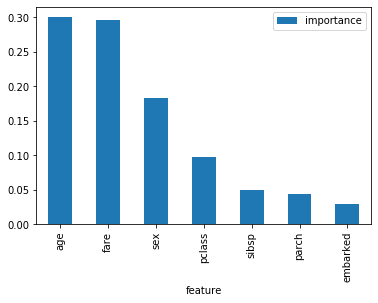

In [225]:
importances.plot.bar()

PRINT THE PREDICTION OF THE RANDOM FOREST CLASSIFIER

In [226]:
pred=model[6].predict(x_test)
print(pred)

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]


PRINT THE ACTUAL VALUE OF THE RANDOM FOREST CLASSIFIER

In [228]:
print(y_test)

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [233]:
#pclass        int64
#sex           int32
#age         float64
#sibsp         int64
#parch         int64
#fare        float64
#embarked      int32
#dtype: object
my_survival=[[2,1,24,0,0,7.9250,2]]
#scaling my survival
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
my_survival_scaled=sc.fit_transform(my_survival)
#PRINT PREDICTION OF MY SURVIVAL USING RANDOM FOREST CLASSIFIER
pred=model[6].predict(my_survival_scaled)
if pred==0:
    print("Oh no! You not make it .")
else:
    print("Nice! you survived !")

Oh no! You not make it .
